# **Método de la Bisección**

Isaac Esteban Uribe Jaramillo


## **1. Importamos librerías**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **2. Inicialización y pre-procesamiento**

### 2.1 Definimos la función y su gráfica

In [2]:
fx = lambda x: 2*np.sin(x)-(x**2/10)

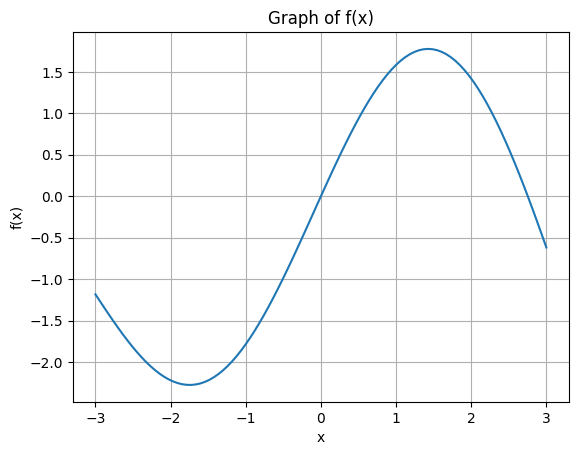

In [6]:
x = np.linspace(-3, 3, 100)
y = fx(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.grid(True)
plt.show()

### 2.2 Seleccionamos valores iniciales para Xl, Xu, Err

In [ ]:
xl, xu = 1, 3
# xl, xu = -2, 2
err = 0.000001

### 2.3 Inicializamos el Dataframe

In [ ]:
df = []

### 2.4 Determinamos cuantas iteraciones necesitamos para llegar a la convergencia

In [ ]:
def iteracionesMaximas(xl,xu,err):
  return int(np.log2((xu - xl) / err) - 1)

## **3. Algorítmo de la Bisección**

In [ ]:
def biseccion(fx,xlower,xupper,err,i_max):
  '''

  '''
  f_xl, f_xu = fx(xlower), fx(xupper)
  if not f_xl * f_xu < 0:
    print("La ecuación no tiene una raiz en el intervalo dado")
    return None
  for i in range(i_max):
    f_xl, f_xu = fx(xlower), fx(xupper)
    xroot = (xlower + xupper) / 2
    f_xr = fx(xroot)
    error = abs(xupper - xlower)
    df.append([i,xlower,xupper,xroot,f_xl,f_xu,f_xr,error])
    if error < err:
      return xroot
    if f_xr * f_xl < 0:
      xupper = xroot
    else:
      xlower = xroot
  return xroot

## **4. Obtención de resultados**

In [ ]:
itermax = iteracionesMaximas(xl,xu,err)
print("Iteraciones máximas: ", itermax)
r = biseccion(fx,xl,xu,err,itermax)
print("La raíz se encuentra aproximadamente en: ", r)

Iteraciones máximas:  19
La raíz se encuentra aproximadamente en:  2.752948760986328


In [ ]:
results = pd.DataFrame(data=df,columns=['Iteración','xl','xu','xr','f(xl)','f(xu)','f(xr)','Error']).set_index('Iteración')
results

,xl,xu,xr,f(xl),f(xu),f(xr),Error
Iteración,,,,,,,
0,1.000000,3.000000,2.000000,1.582942,-0.617760,1.418595,2.000000
1,2.000000,3.000000,2.500000,1.418595,-0.617760,0.571944,1.000000
2,2.500000,3.000000,2.750000,0.571944,-0.617760,0.007072,0.500000
3,2.750000,3.000000,2.875000,0.007072,-0.617760,-0.299671,0.250000
4,2.750000,2.875000,2.812500,0.007072,-0.299671,-0.144647,0.125000
5,2.750000,2.812500,2.781250,0.007072,-0.144647,-0.068345,0.062500
6,2.750000,2.781250,2.765625,0.007072,-0.068345,-0.030523,0.031250
7,2.750000,2.765625,2.757812,0.007072,-0.030523,-0.011696,0.015625
8,2.750000,2.757812,2.753906,0.007072,-0.011696,-0.002305,0.007812


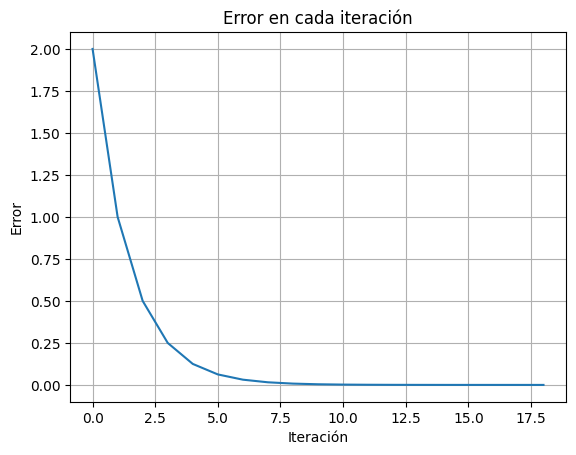

In [ ]:
plt.plot(results.index, results["Error"])
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.title("Error en cada iteración")
plt.grid(True)
plt.show()